In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
dia_set = pd.read_csv("pima-indians-diabetes.csv")
dia_set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dia_set.isnull().values.any()

False

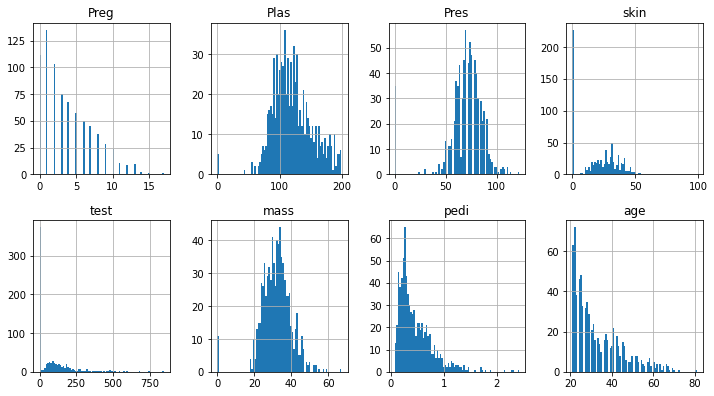

In [4]:
columns = list(dia_set)[0:-1]
dia_set[columns].hist(bins= 80, figsize =(12,50), layout = (14,4));

In [5]:
dia_set.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

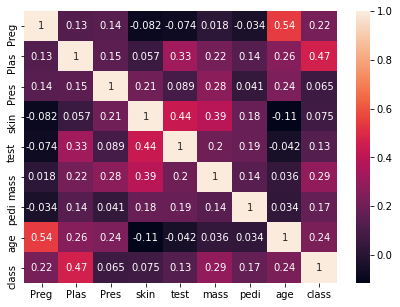

In [6]:
# def plot_corr(dia_set, size=11):
#     corr = dia_set.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr, annot = True)
#     plt.xticks(range(len(corr.columns)), corr.columns)
#     plt.yticks(range(len(corr.columns)), corr.columns)
    
# plot_corr(dia_set)
plt.figure(figsize = (7,5))
sns.heatmap(dia_set.corr(), annot = True)

In [7]:
TM = dia_set['test'].median()
TM

30.5

In [8]:
SM = dia_set['skin'].mean()
SM


20.536458333333332

In [9]:
dia_set['test'] = dia_set['test'].replace(0, np.nan)
dia_set['skin'] = dia_set['skin'].replace(0, np.nan)
dia_set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


In [10]:
dia_set['test'] = dia_set['test'].fillna(TM)

dia_set['skin'] = dia_set['skin'].fillna(SM)
dia_set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35.000000,30.5,33.6,0.627,50,1
1,1,85,66,29.000000,30.5,26.6,0.351,31,0
2,8,183,64,20.536458,30.5,23.3,0.672,32,1
3,1,89,66,23.000000,94.0,28.1,0.167,21,0
4,0,137,40,35.000000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.0,32.9,0.171,63,0
764,2,122,70,27.000000,30.5,36.8,0.340,27,0
765,5,121,72,23.000000,112.0,26.2,0.245,30,0
766,1,126,60,20.536458,30.5,30.1,0.349,47,1


In [11]:
X = dia_set.drop('class', axis = 1)
y = dia_set['class']

X_train,X_test, y_train,y_test= train_test_split(X,y, random_state = 1, test_size = 0.3)

In [12]:
from sklearn.impute import SimpleImputer

replace_ = SimpleImputer(missing_values =0, strategy = 'mean')
cols = X_train.columns

X_train = pd.DataFrame(replace_.fit_transform(X_train))
X_test = pd.DataFrame(replace_.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols


X_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.000000,110.0,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.0,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,30.5,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.0,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,30.5,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2.000000,157.0,74.0,35.000000,440.0,39.4,0.134,30.0
533,7.000000,187.0,50.0,33.000000,392.0,33.9,0.826,34.0
534,13.000000,126.0,90.0,20.536458,30.5,43.4,0.583,42.0
535,4.000000,171.0,72.0,20.536458,30.5,43.6,0.479,26.0


In [13]:
model = LogisticRegression( solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
model.score(X_test, y_test)

0.7792207792207793

In [16]:
Mc = pd.DataFrame(model.coef_)
Mc

,0,1,2,3,4,5,6,7
0,0.122782,0.02649,-0.030172,-0.013274,-0.000294,0.075462,0.3866,0.011526


In [17]:
Mi = pd.DataFrame(model.intercept_)
Mi

,0
0,-4.951059


<AxesSubplot:>

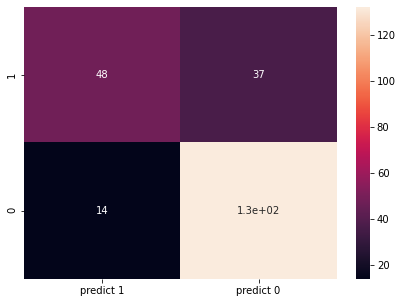

In [20]:
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                    columns = [i for i in ['predict 1', 'predict 0']])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm, annot = True)
#plt.show()


<AxesSubplot:>

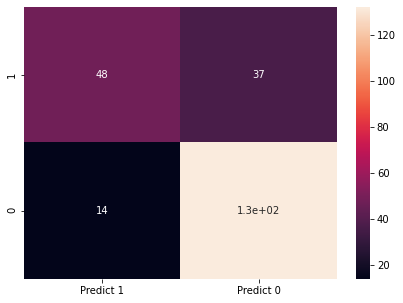

In [21]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], 
                         columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Naive Bayes Algorithm


In [53]:
from sklearn.naive_bayes import GaussianNB

model_ = GaussianNB()
model_.fit(X_train, y_train.ravel())

GaussianNB()

In [76]:
y_predict = model_.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [59]:
model_.score(X_train, y_train)

0.7392923649906891

In [77]:
print ('The Accuracy is {0:4f}'.format(metrics.accuracy_score(y_test, y_predict)))

The Accuracy is 0.770563


#### Classification Report

In [78]:
from sklearn.metrics import classification_report

print('Classification Report')
print (metrics.classification_report(y_test, y_predict, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

